In [147]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import FunctionTransformer, LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [165]:
df = pd.read_csv('/content/mail_data.csv')
df.sample(5)

,Category,Message
4213,spam,Missed call alert. These numbers called but le...
1925,ham,Ok
5187,ham,WHAT TIME U WRKIN?
3395,ham,Bull. Your plan was to go floating off to IKEA...
5245,ham,Thank you princess! I want to see your nice ju...


In [127]:
df.shape

(5572, 2)

In [128]:
df.isna().sum()

,0
Category,0
Message,0


In [129]:
df.duplicated().sum()

np.int64(415)

In [130]:
df.drop_duplicates(inplace=True)

In [131]:
df.shape

(5157, 2)

In [132]:
X = df['Message']
y = df['Category']

In [133]:
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')
from nltk.corpus import stopwords
from nltk import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [134]:
def preprocess(X):
    # converting to lower
    X = X.str.lower()
    # removing numbers and special
    X = X.apply(lambda x: re.sub(r'[^a-zA-Z]',' ',x))
    # removing stopwords and tokenizing
    stop_words = stopwords.words('english')
    X = X.apply(lambda x: [word for word in word_tokenize(x)  if word not in stop_words])
    # joining back the tokens
    X = X.apply(lambda x: ' '.join(x))
    return X
preprocess(X)

,Message
0,go jurong point crazy available bugis n great ...
1,ok lar joking wif u oni
2,free entry wkly comp win fa cup final tkts st ...
3,u dun say early hor u c already say
4,nah think goes usf lives around though
...,...
5567,nd time tried contact u u pound prize claim ea...
5568,b going esplanade fr home
5569,pity mood suggestions
5570,guy bitching acted like interested buying some...


# model training

In [135]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape)

(4125,) (1032,)


In [136]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [139]:
print(le.classes_)
print('ham == 0')
print('spam == 1')

['ham' 'spam']
ham == 0
spam == 1


In [157]:
vectorizer = TfidfVectorizer(max_features=140)
model = LogisticRegression()
pipe = Pipeline([
    ('preprocess', FunctionTransformer(preprocess)),
    ('vectorizer', vectorizer),
    ('model', model)
])
pipe.fit(X_train,y_train)

Pipeline(steps=[('preprocess',
                 FunctionTransformer(func=<function preprocess at 0x79f36bfffba0>)),
                ('vectorizer', TfidfVectorizer(max_features=140)),
                ('model', LogisticRegression())])

In [158]:
y_pred = pipe.predict(X_test)
accuracy_score(y_test,y_pred)

0.9718992248062015

In [159]:
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(f1_score(y_test,y_pred))

0.9147286821705426
0.8676470588235294
0.8905660377358491


In [160]:
cross_val_score(pipe,X_train,y_train,cv=3,scoring='accuracy').mean()

np.float64(0.9602424242424242)

<Axes: >

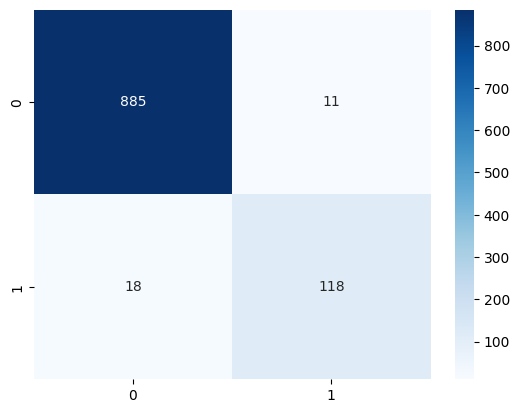

In [161]:
sns.heatmap(confusion_matrix(y_test,y_pred),fmt='d',annot=True,cmap='Blues')

In [154]:
param = {'vectorizer__max_features': [80,90,100,120,140,150]}
grid = GridSearchCV(pipe,param_grid=param,scoring='accuracy',cv=3)
grid.fit(X_train,y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocess',
                                        FunctionTransformer(func=<function preprocess at 0x79f36bfffba0>)),
                                       ('vectorizer',
                                        TfidfVectorizer(max_features=100)),
                                       ('model', LogisticRegression())]),
             param_grid={'vectorizer__max_features': [80, 90, 100, 120, 140,
                                                      150]},
             scoring='accuracy')

In [156]:
grid.best_params_

{'vectorizer__max_features': 140}

# spam classifier

In [168]:
message = ''
prediction = pipe.predict(pd.Series(df.iloc[4213,1]))
if prediction == 0:
    print('ham')
else:
    print('spam')

spam
